## Importing Libraries

In [1]:
import pandas as pd     #importing pandas library
import numpy as np      #importing numpy library
from collections import Counter as c     #importing collections
import matplotlib.pyplot as plt         #importing matplotlib llibrary
from sklearn import preprocessing       #importing preprocessing
import seaborn as sns                   #importing seaborn library
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LogisticRegression

## Loading over dataset

In [2]:
#loading the dataset into the model mentioning the file name
data=pd.read_csv("credit_train.csv")     
#finding the number of rows and columns
data.shape                                

(100514, 19)

In [3]:
data.columns    #lists out the names of the columns 

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [4]:
data.head()       #will display the first five rows of the dataset

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Null Values

In [5]:
#lists the sum of null values in every column of the dataset
data.isnull().sum()   

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

## Categorical Columns

In [6]:
#lists the columns with categorical data
object_train_df=data.select_dtypes(include=['object'])    
object_train_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

## Numerical Columns

In [7]:
#lists the columns with numerical data
num_train_df=data.select_dtypes(include=['int','float'])     
num_train_df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

## Dropping Loan Status Null Values and Labeling it

In [8]:
data.dropna(subset=['Loan Status'], inplace = True)

In [9]:
le = preprocessing.LabelEncoder()
data['Loan Status'] = le.fit_transform(data['Loan Status'])

## Target Column Visualization

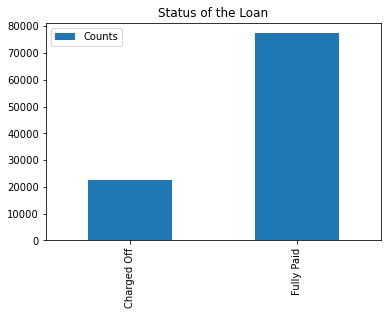

In [10]:
#loan status is the target column, assigned to be zero here,it gives the count of charged off people
coffvalue = data[data['Loan Status'] == 0]['Loan Status'].count()
#loan status is the target column, assigned to be one here,it gives the count of fully paid people
fpaidvalue = data[data['Loan Status'] == 1]['Loan Status'].count()
data1 = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data1, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

## Term column Labeling

In [11]:
# replacing the values in the column[Term] with 0 and 1 in place of short term and long term
data['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [12]:
scount = data[data['Term'] == 0]['Term'].count()
lcount = data[data['Term'] ==1]['Term'].count()

data1 = {"Counts":[scount, lcount]}
#gives the count of short and long term
termDF = pd.DataFrame(data1, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


In [13]:
#displays the sum of null values in credit sccore column
print("There are ", data['Credit Score'].isna().sum(), "null values for Credit score.")

There are  19154 null values for Credit score.


## Scaling Credit Score Column

In [14]:
#Applying lamda function
data['Credit Score'] = data['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

## Handling Null values of Credit Score Column

In [15]:

do_nothing = lambda: None
cscoredf = data[data['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
lscoredf = data[data['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
data.loc[(data.Term ==0) & (data['Credit Score'].isnull()),'Credit Score'] = stermAVG
data.loc[(data.Term ==1) & (data['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [16]:
#For the credit score column applying conditions for the possible outcomes
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Poor" if np.isreal(val)
                                                  and val < 580 else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Average" if np.isreal(val)
                                                  and (val >= 580 and val < 670) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Good" if np.isreal(val) 
                                                  and (val >= 670 and val < 740) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) 
                                                  and (val >= 740 and val < 800) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) 
                                                  and (val >= 800 and val <= 850) else val)

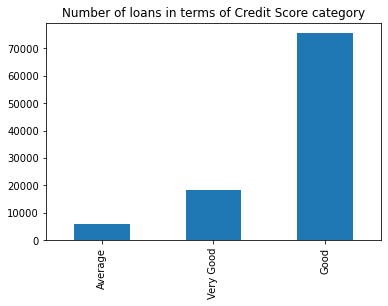

In [17]:
# The graph lists out the counts in an ascending way
data['Credit Score'].value_counts().sort_values(ascending = True)
                       .plot(kind='bar', title ='Number of loans in terms of Credit Score category')

## Annual Income Column

In [18]:
#prints the sum of null values of the column Annual Income
print("There are",data['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [19]:
# By appplying mean we fill the null values
data['Annual Income'].fillna(data['Annual Income'].mean(), inplace=True)

In [20]:
data.shape 

(100000, 19)

In [21]:
from collections import Counter as c
print(c(data['Credit Score']))  #returns the class count values 

Counter({'Good': 75506, 'Very Good': 18479, 'Average': 6015})


In [22]:
data['Credit Score'] = le.fit_transform(data['Credit Score'])  #applying label encoder
c(data['Credit Score'])

Counter({1: 75506, 2: 18479, 0: 6015})

## Home Ownership Column

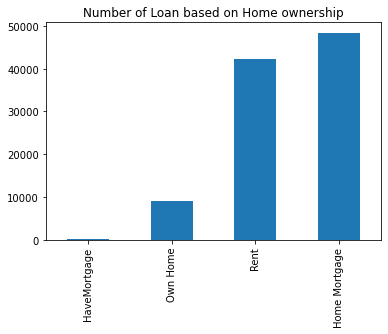

In [23]:
data['Home Ownership'].value_counts().sort_values(ascending = True)
                       .plot(kind='bar', title="Number of Loan based on Home ownership")

In [24]:
print(c(data['Home Ownership']))
data['Home Ownership'] = le.fit_transform(data['Home Ownership'])
print(c(data['Home Ownership']))

Counter({'Home Mortgage': 48410, 'Rent': 42194, 'Own Home': 9182, 'HaveMortgage': 214})
Counter({1: 48410, 3: 42194, 2: 9182, 0: 214})


## Years in current job

In [25]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] = data['Years in current job'].astype(float)

In [26]:
expmean = data['Years in current job'].mean()

In [27]:
data['Years in current job'].fillna(expmean, inplace=True)

In [28]:
data['Years in current job'].fillna(expmean, inplace=True)

## Dropping unwanted columns

In [29]:
data = data.drop(['Loan ID','Customer ID','Purpose'], axis=1)

## Credit Problems

In [30]:
data['Credit Problems'] = data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 
                        else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [31]:
print(c(data['Credit Problems']))
data['Credit Problems'] = le.fit_transform(data['Credit Problems'])
print(c(data['Credit Problems']))

Counter({'No Credit Problem': 86035, 'Some Credit promblem': 13879, 'Major Credit Problems': 86})
Counter({1: 86035, 2: 13879, 0: 86})


## Credit Age

In [32]:
data['Credit Age'] = data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 
                                else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [33]:
print(c(data['Credit Age']))
data['Credit Age'] = le.fit_transform(data['Credit Age'])
print(c(data['Credit Age']))

Counter({'Exceptional Credit Age': 49958, 'Good Credit Age': 49848, 'Short Credit Age': 194})
Counter({0: 49958, 1: 49848, 2: 194})


In [34]:
data = data.drop(['Months since last delinquent','Number of Open Accounts',
                  'Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

## Tax Liens

In [35]:
data['Tax Liens'] = data['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0
                                else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [36]:
print(c(data['Tax Liens']))
data['Tax Liens'] = le.fit_transform(data['Tax Liens'])
print(c(data['Tax Liens']))

Counter({'No Tax Lien': 98062, 'Some Tax Liens': 1717, 'Many Tax Liens': 221})
Counter({1: 98062, 2: 1717, 0: 221})


## Bankruptcies

In [37]:
data['Bankruptcies'] = data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 
                            else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [38]:
print(c(data['Bankruptcies']))
data['Bankruptcies'] = le.fit_transform(data['Bankruptcies'])
print(c(data['Bankruptcies']))

Counter({'No bankruptcies': 88774, 'Some Bankruptcies': 10892, 'Many Bankruptcies': 334})
Counter({1: 88774, 2: 10892, 0: 334})


## Annual Income

In [39]:
meanxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [40]:
data['Annual Income'] = data['Annual Income'].apply(lambda x: "Low Income" if x<=poorline 
                            else ("Average Income" if x>poorline and x<richline else "High Income"))

In [41]:
print(c(data['Annual Income']))
data['Annual Income'] = le.fit_transform(data['Annual Income'])
print(c(data['Annual Income']))

Counter({'Average Income': 86004, 'High Income': 9145, 'Low Income': 4851})
Counter({0: 86004, 1: 9145, 2: 4851})


## Current Loan Amount

In [42]:
lmeanxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084723 498575.76557037106


In [43]:
data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange 
                            else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [44]:
print(c(data['Current Loan Amount']))
data['Current Loan Amount'] = le.fit_transform(data['Current Loan Amount'])
print(c(data['Current Loan Amount']))

Counter({'Medium Loan': 60112, 'Big Loan': 26506, 'Small Loan': 13382})
Counter({1: 60112, 0: 26506, 2: 13382})


In [45]:
data.shape

(100000, 13)

## Seperating Dependent and Independent Columns

In [46]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [47]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
0,1,1,0,1,0,8.0,1,17.2,1.0,2,1,2,0
1,1,1,0,1,0,10.0,1,21.1,0.0,1,1,1,0
2,1,0,0,2,1,8.0,2,14.9,1.0,1,1,2,1
3,1,1,1,1,0,3.0,2,12.0,0.0,1,1,1,1
4,1,1,0,1,0,5.0,3,6.1,0.0,1,1,1,1


## Performing Train and test split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
#By using DecisionTree we are fitting the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [50]:
y_pred_dt =dt.predict(X_test)  #prediction
c(y_pred_dt)

Counter({0: 6742, 1: 26258})

##   Creating a pickle file dumping the model in it

In [51]:
import pickle    #importing the pickle file

pickle.dump(dt,open('loan.pkl','wb'))    #Dumping the model into the pickle file

In [1]:
!pip install jupyterthemes

In [6]:
! jt -tmonokai